# 2. Data Exploration and Preprocessing

In this section the data is loaded and explored. The data is preprocessed and transformed into a format that can be used for the machine learning models.
This includes:
* Loading the data from the csv file and loading python libraries
* Exploring Target and Features
    * Checking for missing values
    * Exploring the target, number of accidents by accident types
    * Exploring the features
        * Number of accidents by type and day of the week
        * Number of accidents by type and hour of the day
        * Number of accidents by type and month
        * Number of accidents by type and road type
* Encoding Ordinal and Categorical Features
* Normalizing the data

## 2.1 Import Libraries and Load Data

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

# Load the data
data = pd.read_csv('roadtrafficaccidentlocations.csv')

data.head() 



,AccidentUID,AccidentType,AccidentType_de,AccidentType_fr,AccidentType_it,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_de,AccidentSeverityCategory_fr,AccidentSeverityCategory_it,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
0,9FC221265B5EE0F0E0430A865E33E0F0,at0,Schleuder- oder Selbstunfall,dérapage ou perte de maîtrise,Incidente di sbandamento o per colpa propria,Accident with skidding or self-accident,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw405,Freitag,vendredi,Venerdì,Friday,8,08h-09h
1,9FC221265E13E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw406,Samstag,samedi,Sabato,Saturday,17,17h-18h
2,9FC22126601FE0F0E0430A865E33E0F0,at3,Abbiegeunfall,accident en quittant une route,Incidente nello svoltare,Accident when turning left or right,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,10,10h-11h
3,9FC22126614DE0F0E0430A865E33E0F0,at2,Auffahrunfall,accident par tamponnement,Incidente di tamponamento,Accident with rear-end collision,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw404,Donnerstag,jeudi,Giovedì,Thursday,13,13h-14h
4,9FC2212663A3E0F0E0430A865E33E0F0,at7,Parkierunfall,accident en parquant,Incidente nel parcheggiare,Accident when parking,as4,Unfall mit Sachschaden,accident avec dommages matériels,Incidente con danni materiali,...,janvier,Gennaio,January,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,10,10h-11h


The Data contains a lot of columns. We are only interessted in the following columns:
* AccidentType_en (Target)
* RoadType_en
* AccidentMonth
* AccidentWeekDay_en
* AccidentHour

These features are considered to be the most important for the prediction of the accident type.

At a later point in time, it might be interesting to include the following columns as targets:
* AccidentSeverityCategory_en
* AccidentInvolvedPederastrian
* AccidentInvolvedBicycle
* AccidentInvolvedMotorcycle

## 2.2 Feature Selection and Target Definition


In [2]:
# Selecting the columns we are interested in
data = data[['AccidentSeverityCategory_en', 'AccidentType_en', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]
data.head()

,AccidentSeverityCategory_en,AccidentType_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with property damage,Accident with skidding or self-accident,False,False,False,Minor road,1,Friday,8
1,Accident with property damage,Accident when parking,False,False,False,Minor road,1,Saturday,17
2,Accident with property damage,Accident when turning left or right,False,False,False,Minor road,1,Thursday,10
3,Accident with property damage,Accident with rear-end collision,False,False,False,Principal road,1,Thursday,13
4,Accident with property damage,Accident when parking,False,False,False,Other,1,Wednesday,10


## 2.3 Missing Values

Checking for missing values

In [3]:
for col in data.columns:
    print(col, data[col].isnull().sum())


AccidentSeverityCategory_en 0
AccidentType_en 0
AccidentInvolvingPedestrian 0
AccidentInvolvingBicycle 0
AccidentInvolvingMotorcycle 0
RoadType_en 0
AccidentMonth 0
AccidentWeekDay_en 0
AccidentHour 0


No missing values detected. It can be proceeded without further actions.

## 2.4 Target Exploration

At first the Target is explored. For This the number of accidents by type is plotted.

Text(0.5, 1.0, 'Number of Accidents by Severity')

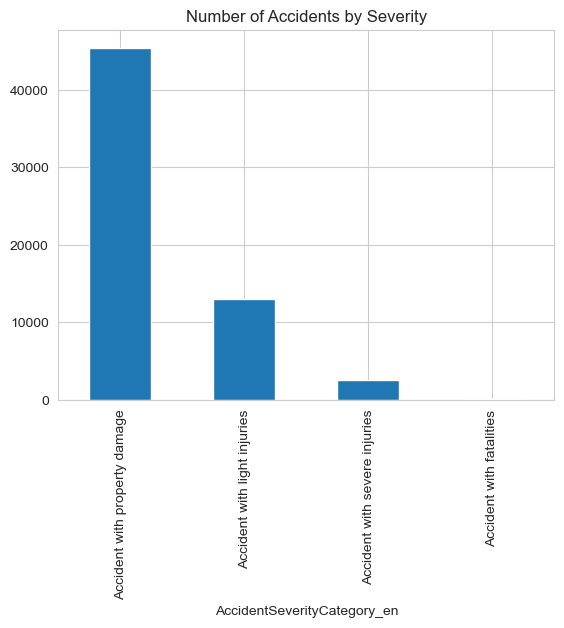

In [19]:
# Number of Accidents according to type
# data['AccidentType_en'].value_counts().plot(kind='bar')
# plt.title('Number of Accidents by Type')

# Number of Accidents by Severity
data['AccidentSeverityCategory_en'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Severity')




# Comment Luca: Data isn't necessarily unbalanced. This is the WHOLE population data from city of Zurich. It reflects reality, rather than a poor sampling strategy


The data is unbalanced. This need to be taken into account. 
* Type "Other" could be neglected
* Approach: Undersampling, taking only 1000 samples of each type

Balancing the data has to be done in the modeling process. Therefore it is not further considered here. 
The absolute number of accident types is shown below. 

In [5]:
# Number of Accidents of each accident type

data['AccidentType_en'].value_counts()

data['AccidentSeverityCategory_en'].value_counts()


AccidentSeverityCategory_en
Accident with property damage    45427
Accident with light injuries     13006
Accident with severe injuries     2540
Accident with fatalities            85
Name: count, dtype: int64

## 2.5 Feature Exploration
### 2.5.1 Number of Accidents by Type and Day of the Week
### NEW 2.5.1 Number of Accidents by Severity and Type, as well as Severity and Day of the Week

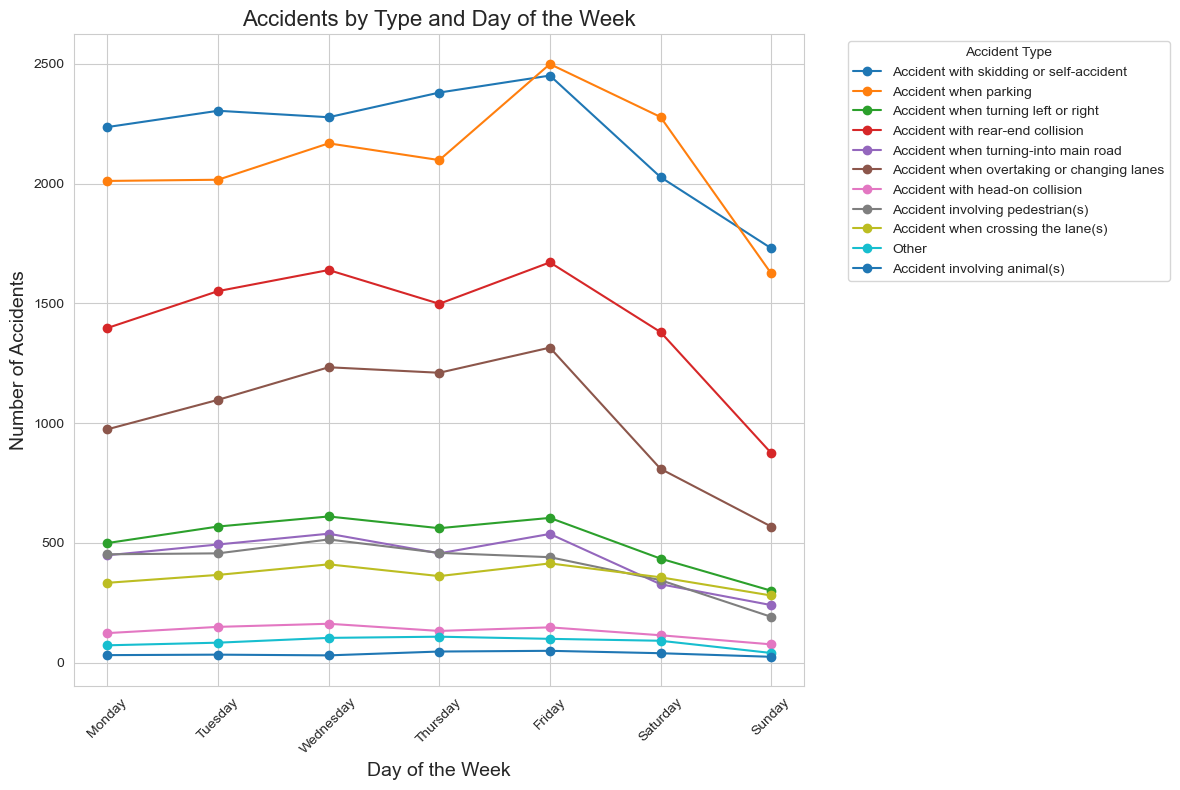

In [6]:
# numer of accidents by accident type and day of the week
# extracting the data
accidents_per_day = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The number of accidents is quite constant over the week.
The number of accidents on weekends is lower than on weekdays. But an increase of accidents can be osererved on Fridays.

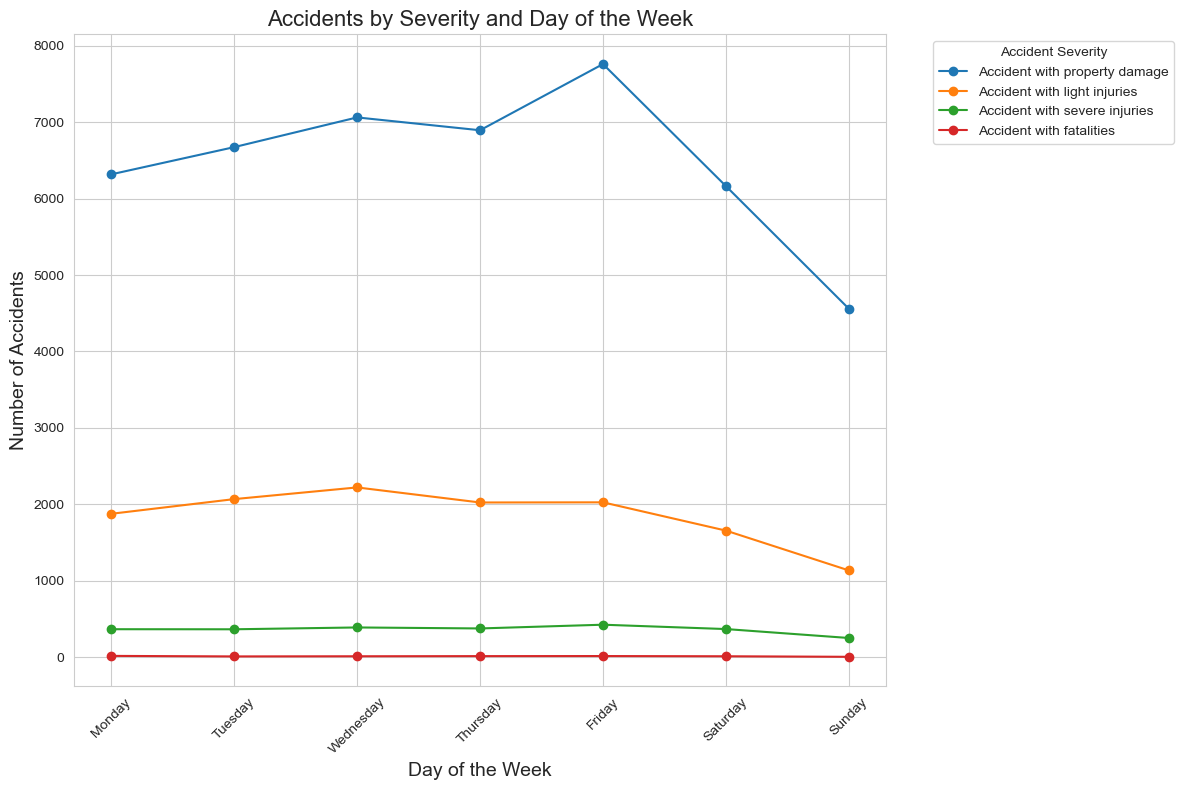

In [7]:
# numer of accidents by accident severity and day of the week
# extracting the data
accidents_per_day = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentDay in data['AccidentWeekDay_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentWeekDay_en'] == AccidentDay)
        ].shape[0]
        counts.append(count)
    accidents_per_day[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
columns = data['AccidentWeekDay_en'].unique() 
result_df = pd.DataFrame.from_dict(accidents_per_day, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.xticks(range(len(desired_order)), desired_order)

plt.show()


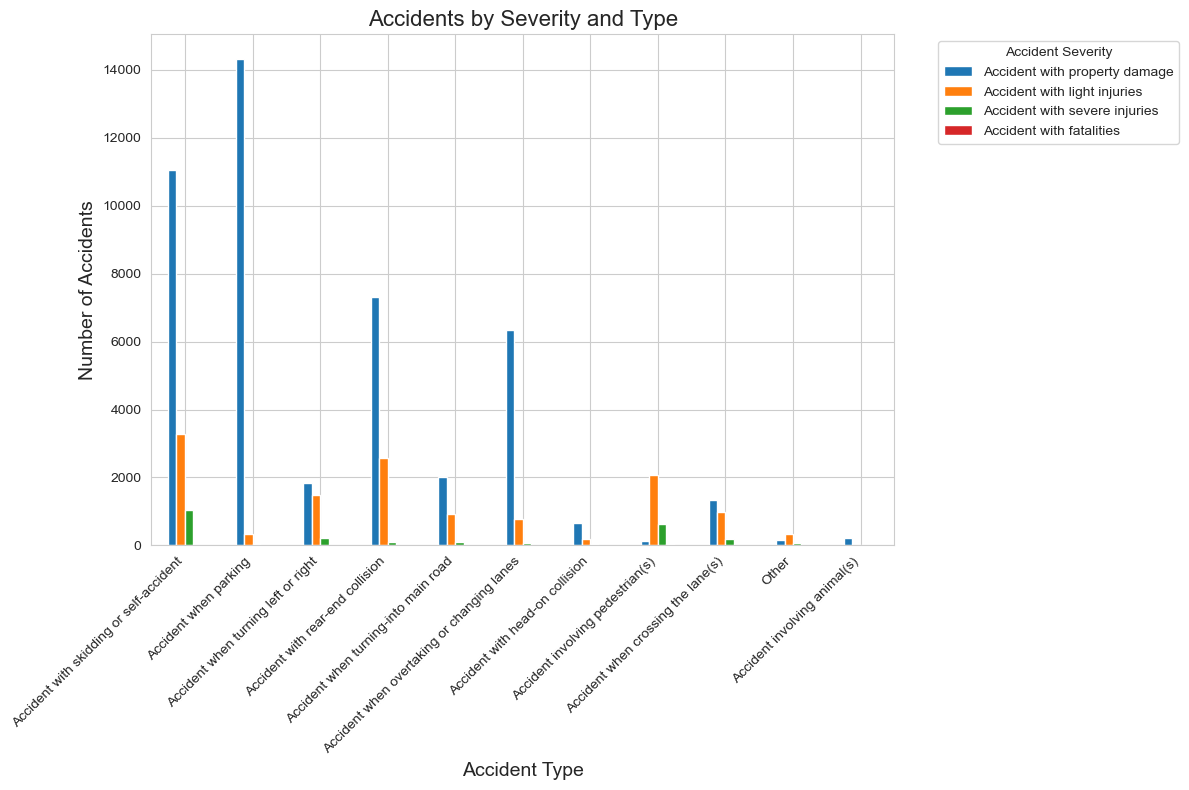

In [8]:
# numer of accidents by accident severity and day of the week
# extracting the data
accidents_per_type = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentType in data['AccidentType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentType_en'] == AccidentType)
        ].shape[0]
        counts.append(count)
    accidents_per_type[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order =  data['AccidentType_en'].unique()
columns =  data['AccidentType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_type, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='bar', figsize=(12, 8))

# Customize the plot
plt.title('Accidents by Severity and Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()
    

### 2.5.2 Number of Accidents by Type and Hour of the Day


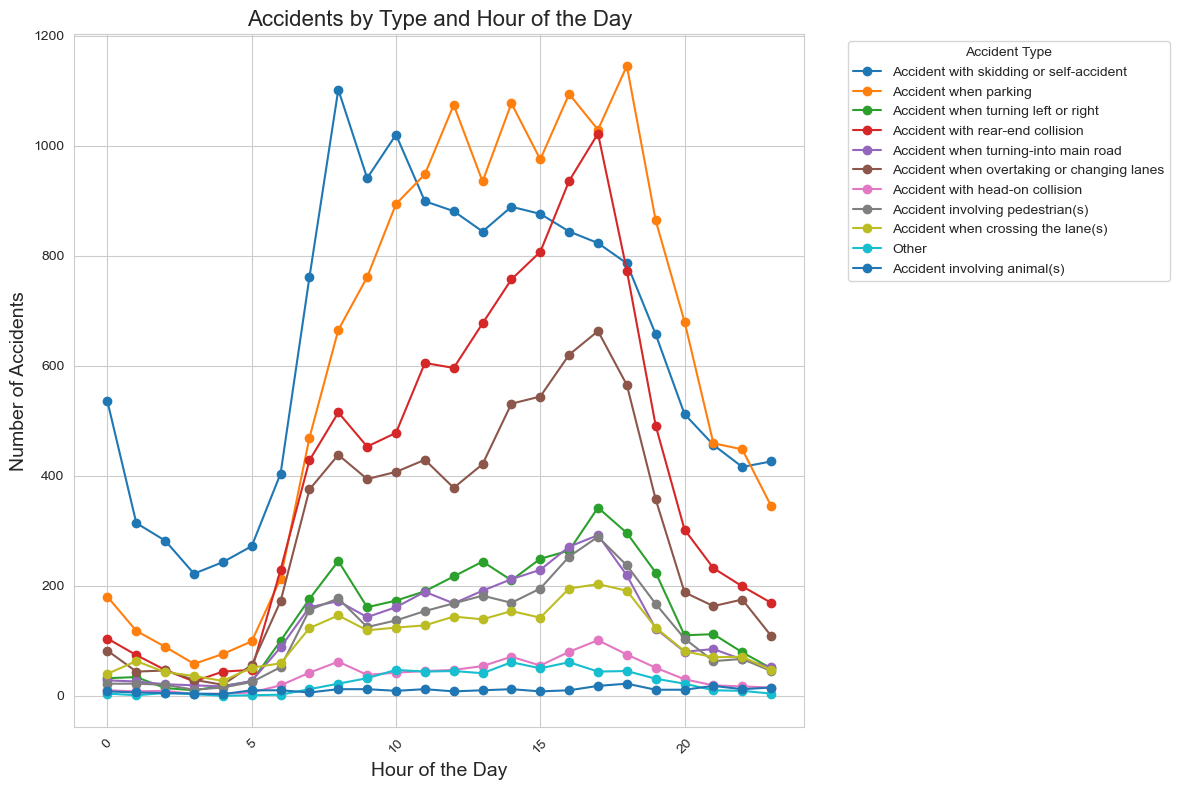

In [9]:
# numer of accidents by accident type and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_hour[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_hour, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
    

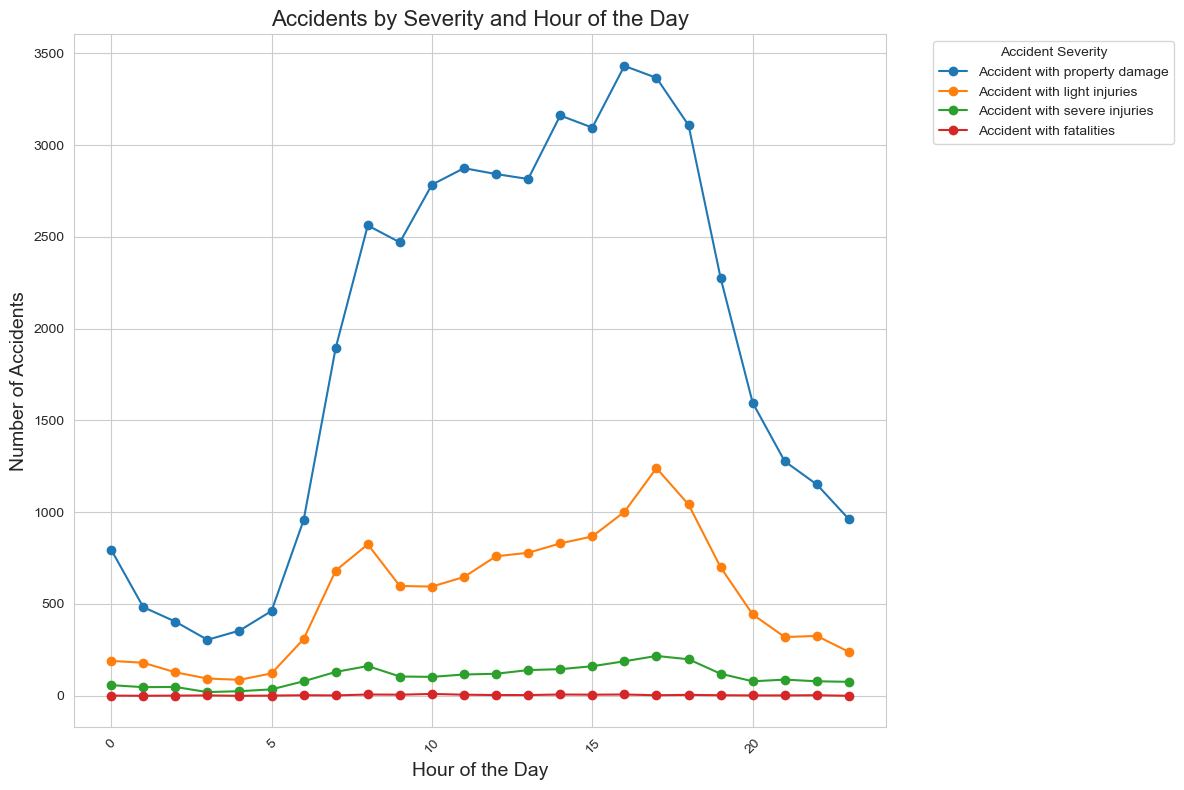

In [10]:
# numer of accidents by accident severity and hour of the day
# extracting the data
accidents_per_hour = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentHour in data['AccidentHour'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentHour'] == AccidentHour)
        ].shape[0]
        counts.append(count)
    accidents_per_hour[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
columns = data['AccidentHour'].unique()  
result_df = pd.DataFrame.from_dict(accidents_per_hour, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents is the lowest between 2 and 5 o'clock. The number of accidents is the highest between 16 and 18 o'clock.
A tendency can be observed that the number of accidents increase towards the afternoon and evening hours.

### 2.5.3 Number of Accidents by Type and Month

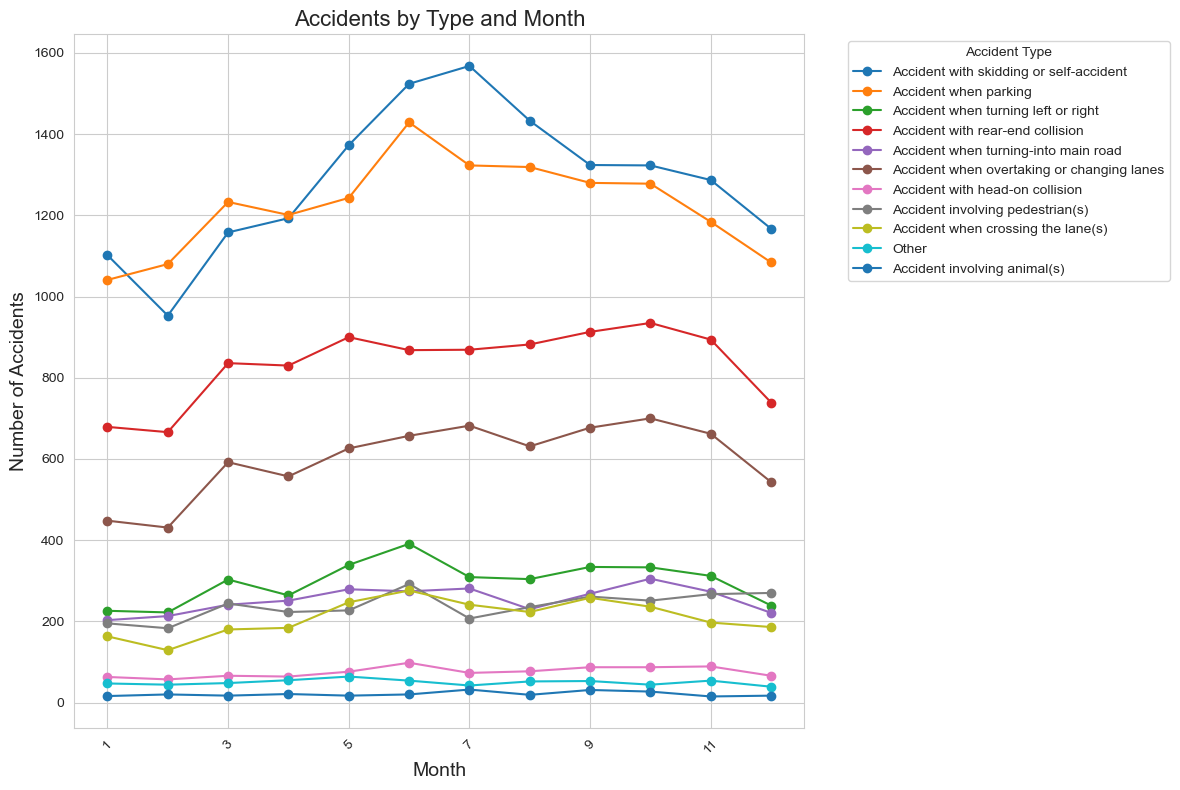

In [11]:
# numer of accidents by accident type and month
# extracting the data
accidents_per_month = {}
for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_month[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_month, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Type and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


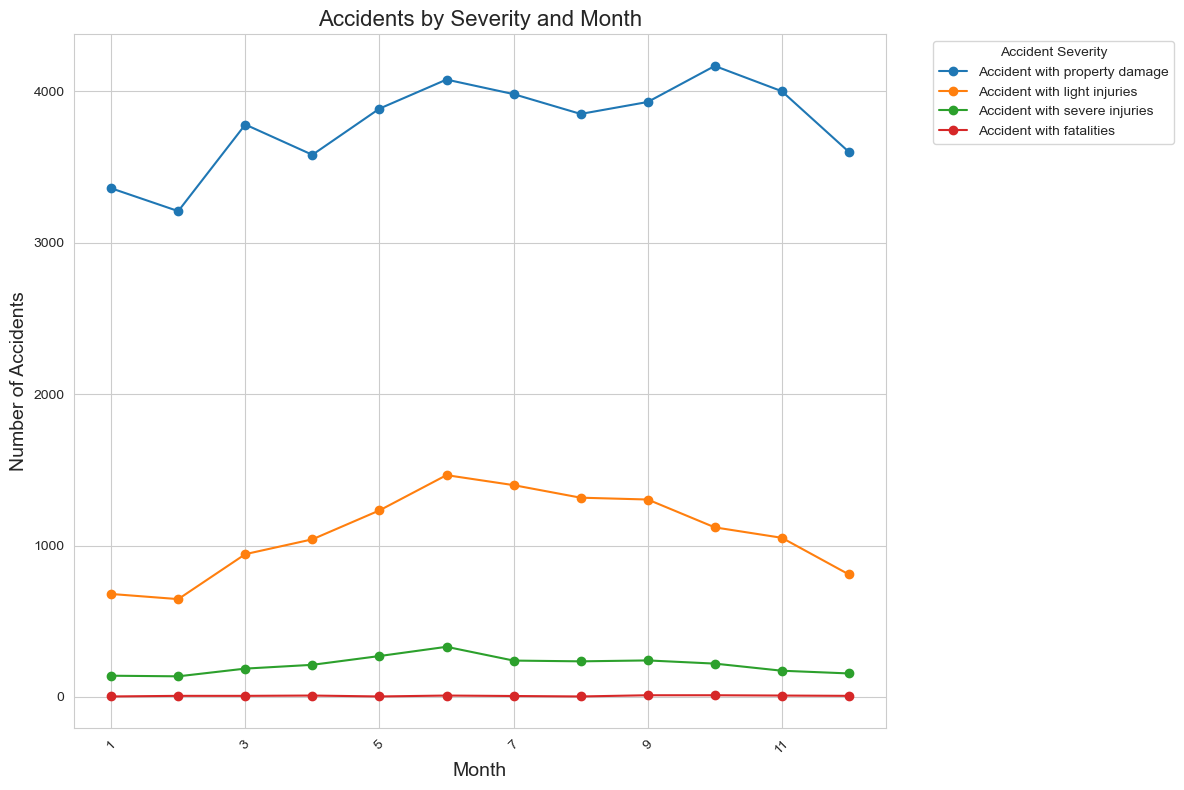

In [12]:
# numer of accidents by accident severity and month
# extracting the data
accidents_per_month = {}
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for AccidentMonth in data['AccidentMonth'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['AccidentMonth'] == AccidentMonth)
        ].shape[0]
        counts.append(count)
    accidents_per_month[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
columns = data['AccidentMonth'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_month, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot

plt.title('Accidents by Severity and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The number of accidents seems to be lower in winter months. The number of accidents is the higher in summer months. The difference is not that remarkable. 

### 2.5.4 Number of Accidents by Type and Road Type

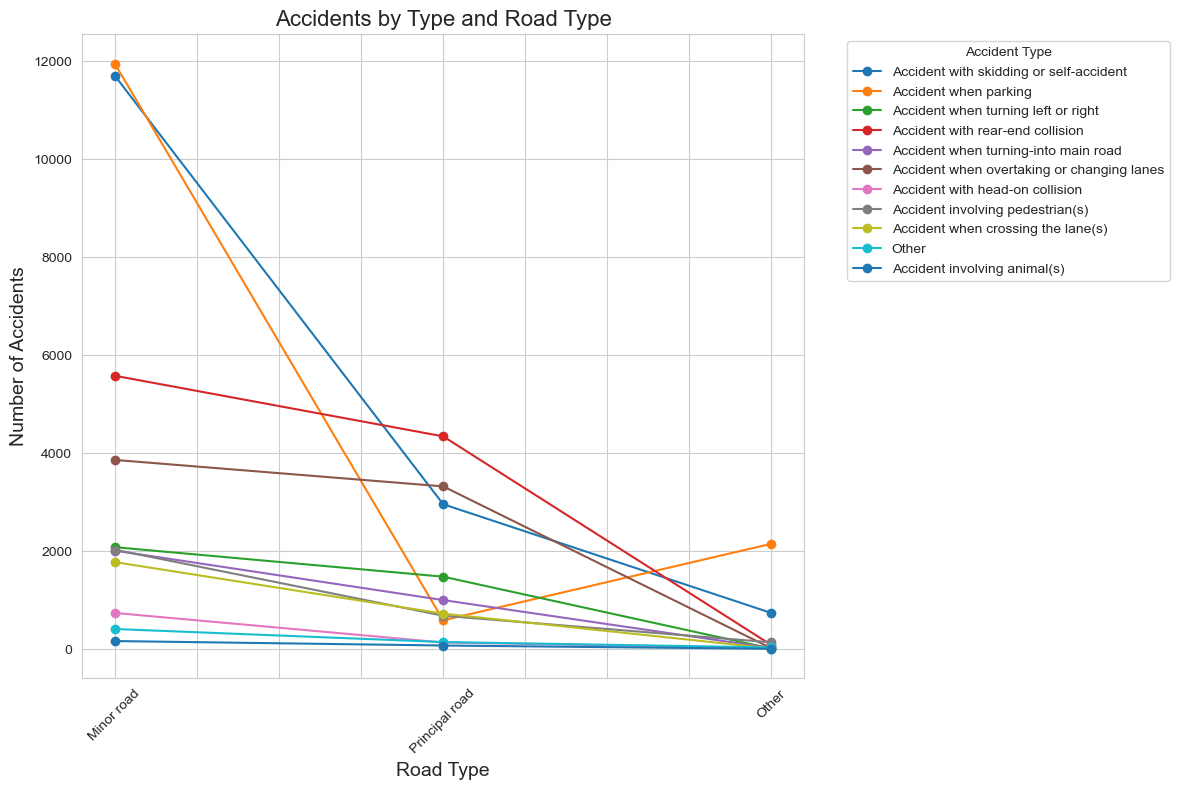

In [13]:
# numer of accidents by accident type and road type
# extracting the data
accidents_per_road = {}

for AccidentType in data['AccidentType_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentType_en'] == AccidentType) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentType] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentType'}, inplace=True)
result_df.set_index('AccidentType', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Type and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()



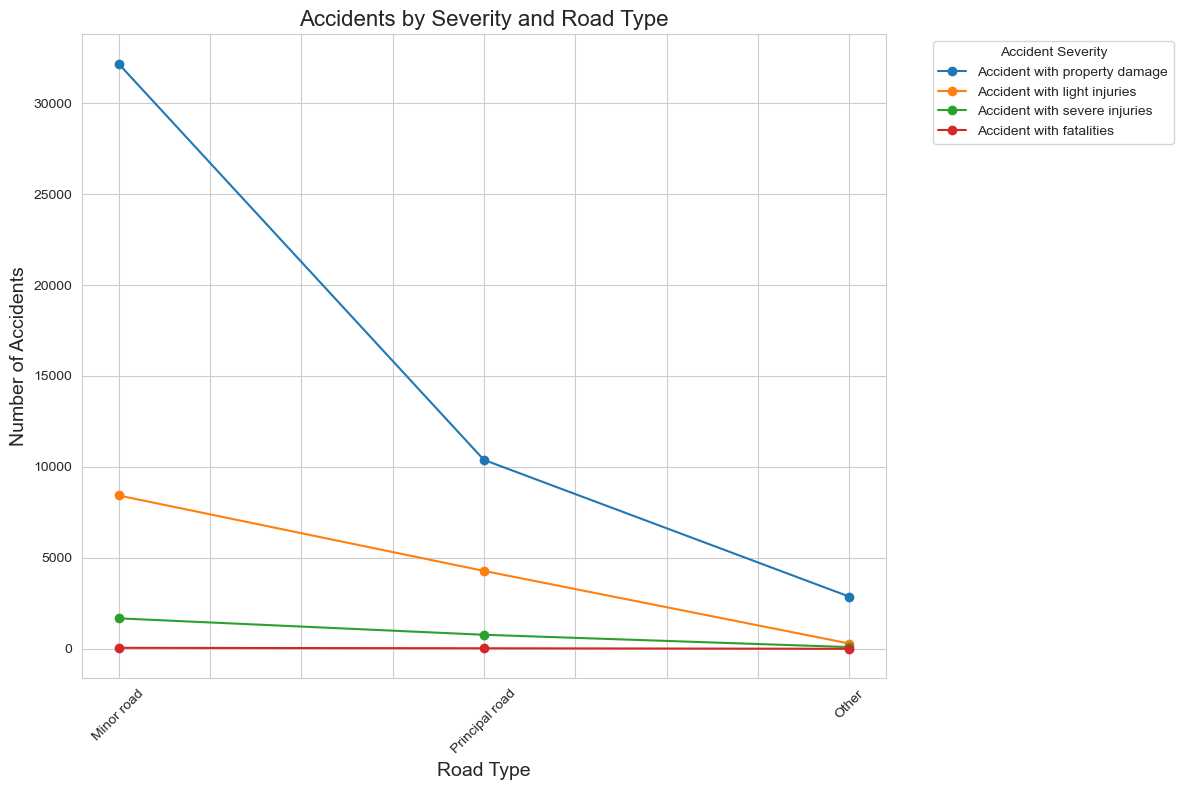

In [14]:
# numer of accidents by accident severity and road type
# extracting the data
accidents_per_road = {}

for AccidentSeverity in data['AccidentSeverityCategory_en'].unique():
    counts = []
    for RoadType in data['RoadType_en'].unique():
        count = data.loc[
            (data['AccidentSeverityCategory_en'] == AccidentSeverity) &
            (data['RoadType_en'] == RoadType)
        ].shape[0]
        counts.append(count)
    accidents_per_road[AccidentSeverity] = counts
    
# Create a pandas DataFrame from the extracted data
desired_order = ['Minor road', 'Principal road', 'Other']
columns = data['RoadType_en'].unique()
result_df = pd.DataFrame.from_dict(accidents_per_road, orient='index', columns=columns)
result_df = result_df[desired_order]

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True)

# Plot the data
result_df.T.plot(kind='line', figsize=(12, 8), marker='o')

# Customize the plot
plt.title('Accidents by Severity and Road Type', fontsize=16)
plt.xlabel('Road Type', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()

### 2.5.4 Number of Accidents by Severity and 

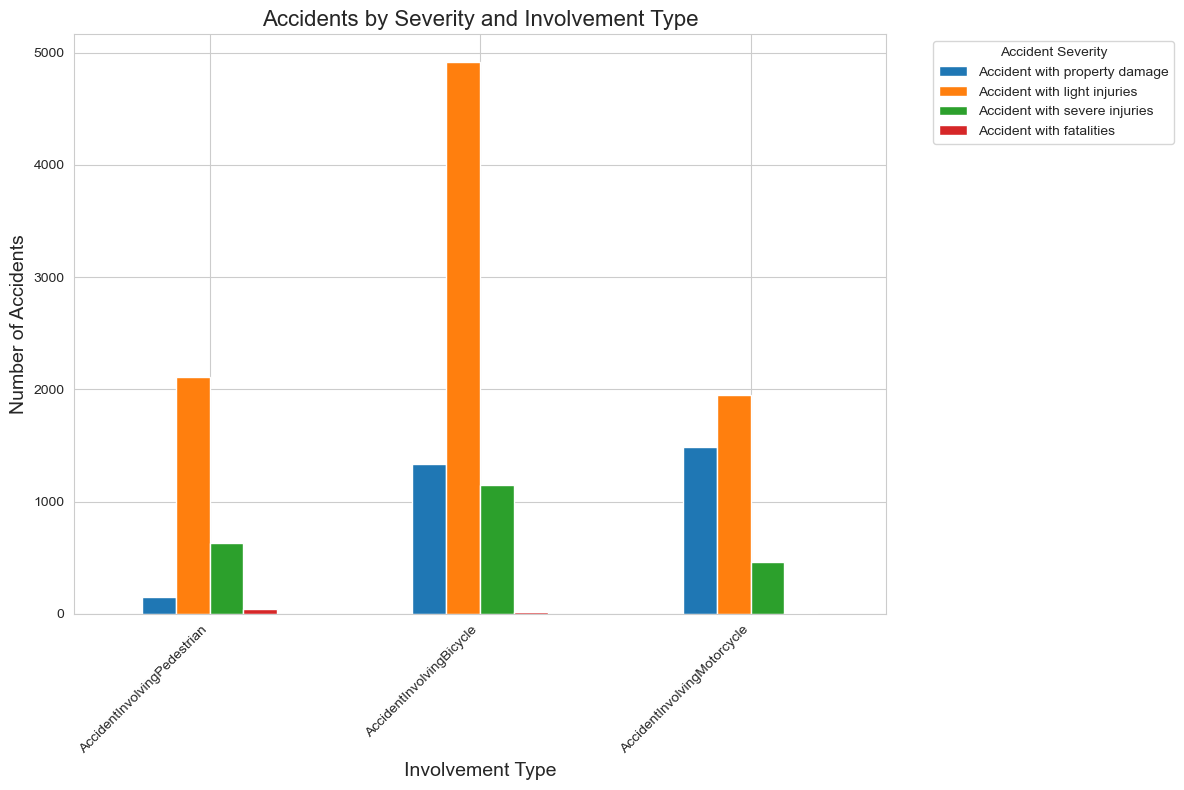

In [15]:
# numer of accidents by accident severity and Involvement of others
# extracting the data
accidents_per_involvement = {} 
involvement_columns = ['AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle'] 
for AccidentSeverity in data['AccidentSeverityCategory_en'].unique(): 
    counts = [] 
    for Involvement in involvement_columns: 
        count = data.loc[ (data['AccidentSeverityCategory_en'] == AccidentSeverity) & (data[Involvement] == True) ].shape[0] 
        counts.append(count) 
        accidents_per_involvement[AccidentSeverity] = counts 
        
# Create a pandas DataFrame from the extracted data 
        
columns = involvement_columns 
result_df = pd.DataFrame.from_dict(accidents_per_involvement, orient='index', columns=columns) 

result_df.reset_index(inplace=True) 
result_df.rename(columns={'index': 'AccidentSeverity'}, inplace=True)
result_df.set_index('AccidentSeverity', inplace=True) 

# Plot the data 
result_df.T.plot(kind='bar', figsize=(12, 8)) 

# Customize the plot 
plt.title('Accidents by Severity and Involvement Type', fontsize=16) 
plt.xlabel('Involvement Type', fontsize=14) 
plt.ylabel('Number of Accidents', fontsize=14) 
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45, ha='right') 

plt.tight_layout() 
plt.show()

## 2.6 Encoding
The data has to be transformed into numerical values.
Firstly the unique values of the columns are checked.


In [16]:
# Check the unique values of the columns
for col in data.columns:
    print(col, data[col].unique())

AccidentSeverityCategory_en ['Accident with property damage' 'Accident with light injuries'
 'Accident with severe injuries' 'Accident with fatalities']
AccidentType_en ['Accident with skidding or self-accident' 'Accident when parking'
 'Accident when turning left or right' 'Accident with rear-end collision'
 'Accident when turning-into main road'
 'Accident when overtaking or changing lanes'
 'Accident with head-on collision' 'Accident involving pedestrian(s)'
 'Accident when crossing the lane(s)' 'Other'
 'Accident involving animal(s)']
AccidentInvolvingPedestrian [False  True]
AccidentInvolvingBicycle [False  True]
AccidentInvolvingMotorcycle [False  True]
RoadType_en ['Minor road' 'Principal road' 'Other']
AccidentMonth [ 1  2  3  4  5  6  7  8  9 10 11 12]
AccidentWeekDay_en ['Friday' 'Saturday' 'Thursday' 'Wednesday' 'Monday' 'Tuesday' 'Sunday']
AccidentHour [ 8 17 10 13 14  7  9 12 19 23 16  4 11 18 15  1  2 20  0  6 21  5 22  3]


Now the data has to be transformed into numerical values. 
* AccidentType_en --> LabelEncoder
* RoadType_en --> OneHotEncoding or OrdinalEncoding
* AccidentMonth --> already numerical
* AccidentWeekDay_en --> OrdinalEncoding or CyclicEncoding
* AccidentHour --> already numerical

Encoding of RoadType_en will be done with OneHotEncoding, because we didn't want to introduce a ranking of the different road types. This procedures is suitable for the planed models kNN, RandomForest and SVM. Unfortunately this will increase the dimensionality of the data.
Alternatively we could use OrdinalEncoding  which would have been quite straight forward. 

Encoding of AccidentWeekDay_en will be done with OrdinalEncoding. This is simple and efficient. A drawback is that a possible cyclic pattern will not be considered. 
To ensure that the cyclic pattern is considered, we could use a CyclicEncoding. This would be more complex and is not implemented here.

In [17]:
# Luca, new:

Now the data has to be transformed into numerical values. 
* AccidentSeverity_en --> OrdinalEncoding
* AccidentType_en --> OneHotEncoding
* RoadType_en --> OneHotEncoding
* AccidentMonth --> already numerical, but still needs OneHotEncoding
* AccidentWeekDay_en --> OneHotEncoding
* AccidentHour --> OneHotEncoding
* AccidentInvolvingPedestrian --> Boolean
* AccidentInvolvingBicycle --> Boolean
* AccidentInvolvingMotorcycle --> Boolean

OneHotEncoding is utilized for all data, except for AccidentSeverity. This is because we do not with to introduce or presume any inherent structures or
order of importance in these data. Accident severity, on the other hand, is clearly delineated into ranks.


SyntaxError: invalid syntax (2181046162.py, line 3)

In [317]:
data = pd.read_csv('roadtrafficaccidentlocations.csv')

data = data[['AccidentSeverityCategory_en', 'AccidentType_en', 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType_en', 'AccidentMonth', 'AccidentWeekDay_en', 'AccidentHour']]

data.head()

,AccidentSeverityCategory_en,AccidentType_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour
0,Accident with property damage,Accident with skidding or self-accident,False,False,False,Minor road,1,Friday,8
1,Accident with property damage,Accident when parking,False,False,False,Minor road,1,Saturday,17
2,Accident with property damage,Accident when turning left or right,False,False,False,Minor road,1,Thursday,10
3,Accident with property damage,Accident with rear-end collision,False,False,False,Principal road,1,Thursday,13
4,Accident with property damage,Accident when parking,False,False,False,Other,1,Wednesday,10


In [318]:
# Transform the data

# OrdinalEncoding for Accident Severity
severity_order = ['Accident with property damage', 'Accident with light injuries', 'Accident with severe injuries', 'Accident with fatalities']

encoder = preprocessing.OrdinalEncoder(categories=[severity_order]) 
# Fit and transform the data 
encoded_severity = encoder.fit_transform(data[['AccidentSeverityCategory_en']])
data['AccidentSeverity_Encoded'] = encoded_severity

data['AccidentSeverity_Encoded'][:10] # => Verified with dataframe, this is correct!

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    0.0
8    1.0
9    0.0
Name: AccidentSeverity_Encoded, dtype: float64

In [326]:
# OneHotEncoding for AccidentType_en
OHE = preprocessing.OneHotEncoder()

OHE_AccidentType_en = data['AccidentType_en'].values.reshape(-1,1)
OHE_AccidentType_en = OHE.fit_transform(OHE_AccidentType_en).toarray()

# Delete AccidentType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data.drop('AccidentType_en', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(OHE_AccidentType_en, columns=['Accident with skidding or self-accident',
                                                                   'Accident when parking',
                                                                   'Accident when turning left or right',
                                                                   'Accident with rear-end collision',
                                                                   'Accident when turning-into main road',
                                                                   'Accident when overtaking or changing lanes',
                                                                   'Accident with head-on collision',
                                                                   'Accident involving pedestrian(s)',
                                                                   'Accident when crossing the lane(s)',
                                                                   'Other',
                                                                   'Accident involving animal(s)'])], axis=1)

In [304]:
# OneHotEncoding for RoadType_en
OHE = preprocessing.OneHotEncoder()
OHE_RoadType_en = data['RoadType_en'].values.reshape(-1,1)
OHE_RoadType_en = OHE.fit_transform(OHE_RoadType_en).toarray()

# Delete RoadType_en from pandas DataFrame and add the new columns from the OneHotEncoding
data.drop('RoadType_en', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(OHE_RoadType_en, columns=['Minor road', 'Principal road', 'Other road type'])], axis=1)


In [315]:
# OneHotEncoding for AccidentMonth

month_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

data = data.sort_values('AccidentMonth')
data['AccidentMonth'] = pd.Categorical(data['AccidentMonth'], categories=month_order, ordered=True)

OHE = preprocessing.OneHotEncoder()
OHE_AccidentMonth = data['AccidentMonth'].values.reshape(-1,1)
OHE_AccidentMonth = OHE.fit_transform(OHE_AccidentMonth).toarray()

# Delete AccidentMonth from pandas DataFrame and add the new columns from the OneHotEncoding
data.drop('AccidentMonth', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(OHE_AccidentMonth, columns=month_columns)], axis=1)



ValueError: Shape of passed values is (61058, 1), indices imply (61058, 12)

In [306]:
# OneHotEncoding for AccidentWeekDay_en
OHE = preprocessing.OneHotEncoder()

data = data.sort_values('AccidentWeekDay_en')


OHE_AccidentWeekDay_en = data['AccidentWeekDay_en'].values.reshape(-1,1)
OHE_AccidentWeekDay_en = OHE.fit_transform(OHE_AccidentWeekDay_en).toarray()

# Delete AccidentWeekDay_en from pandas DataFrame and add the new columns from the OneHotEncoding
data.drop('AccidentWeekDay_en', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(OHE_AccidentWeekDay_en, columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])], axis=1)

In [311]:
data.iloc[:10,:]

,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentMonth,AccidentWeekDay_en,AccidentHour,AccidentSeverity_Encoded,Accident with skidding or self-accident,Accident when parking,Accident when turning left or right,Accident with rear-end collision,Accident when turning-into main road,Accident when overtaking or changing lanes,Accident with head-on collision,Accident involving pedestrian(s),Accident when crossing the lane(s),Other,Accident involving animal(s)
0,Accident with property damage,False,False,False,Minor road,1,Friday,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Accident with property damage,False,False,False,Minor road,1,Saturday,17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Accident with property damage,False,False,False,Minor road,1,Thursday,10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Accident with property damage,False,False,False,Principal road,1,Thursday,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Accident with property damage,False,False,False,Other,1,Wednesday,10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Accident with property damage,False,False,False,Minor road,1,Friday,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,Accident with light injuries,False,True,False,Minor road,1,Monday,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Accident with property damage,False,False,False,Principal road,1,Thursday,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,Accident with light injuries,False,False,False,Minor road,1,Saturday,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,Accident with property damage,False,False,False,Minor road,1,Monday,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Now there is only numeric data which can be normalized.

## 2.7 Normalization
The data should be normalized. To find out which normalization is the best, the following were tested: 
Normalization can only be done after train test split. 
* StandardScaler
* MinMaxScaler
* RobustScaler
* Normalizer
* PowerTransformer
* QuantileTransformer

The normalized data was plotted in a histogram and the best normalization was chosen. Criteria for the best normalization were: 
* The data is centered around 0
* The data is scaled to a certain range
* The data is normally distributed
* The data is not affected by outliers 

array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

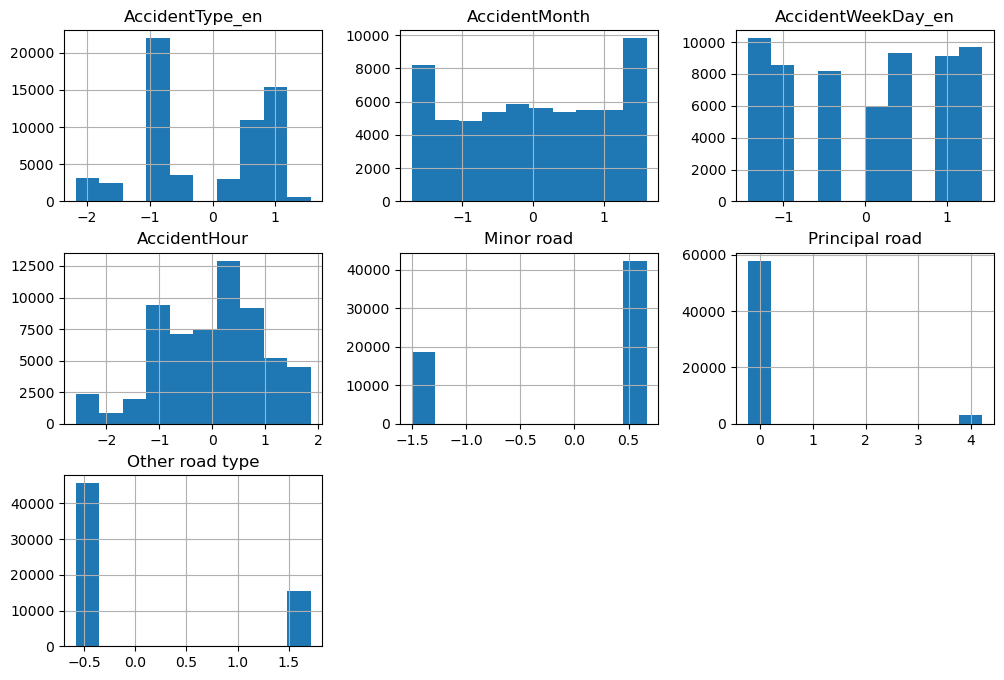

In [30]:
# Normalize the data with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))




array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

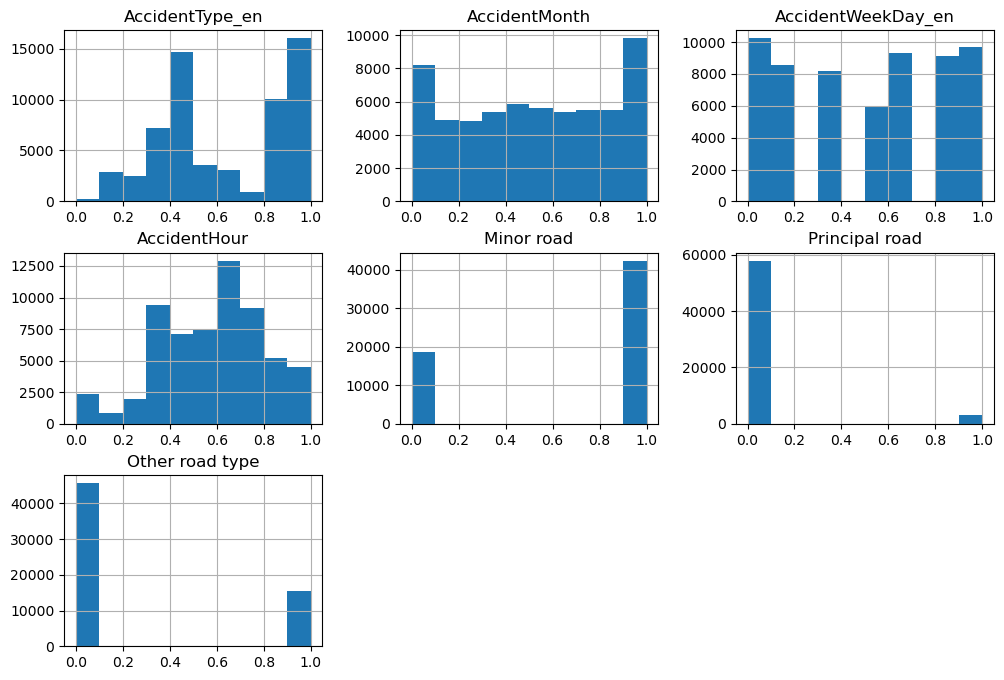

In [31]:
# Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

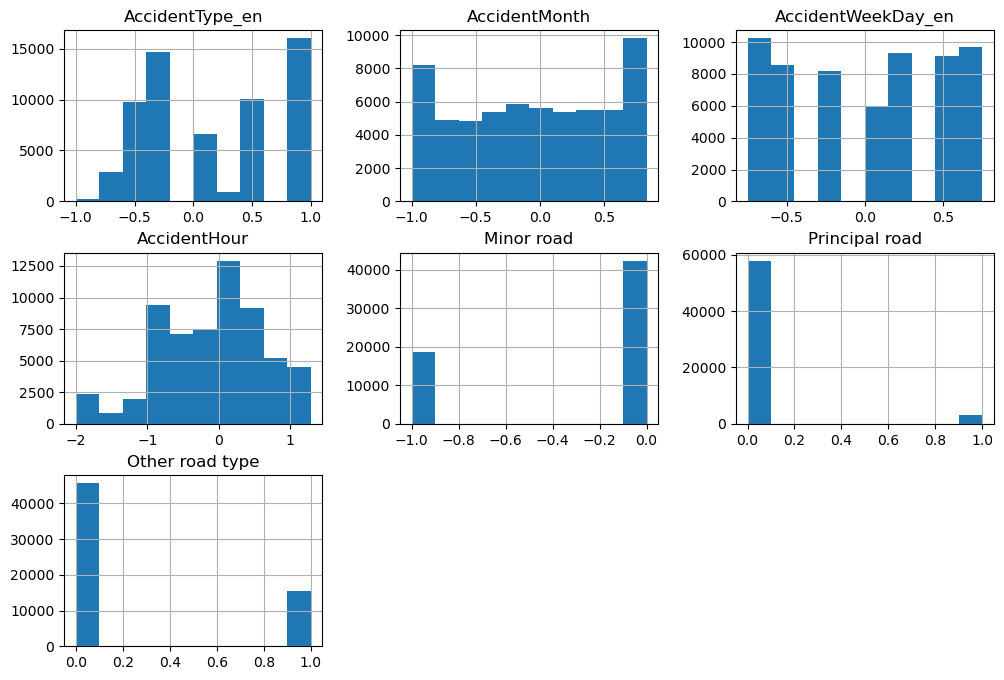

In [32]:
# Normalize the data with RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


array([[<Axes: title={'center': 'AccidentType_en'}>,
        <Axes: title={'center': 'AccidentMonth'}>,
        <Axes: title={'center': 'AccidentWeekDay_en'}>],
       [<Axes: title={'center': 'AccidentHour'}>,
        <Axes: title={'center': 'Minor road'}>,
        <Axes: title={'center': 'Principal road'}>],
       [<Axes: title={'center': 'Other road type'}>, <Axes: >, <Axes: >]],
      dtype=object)

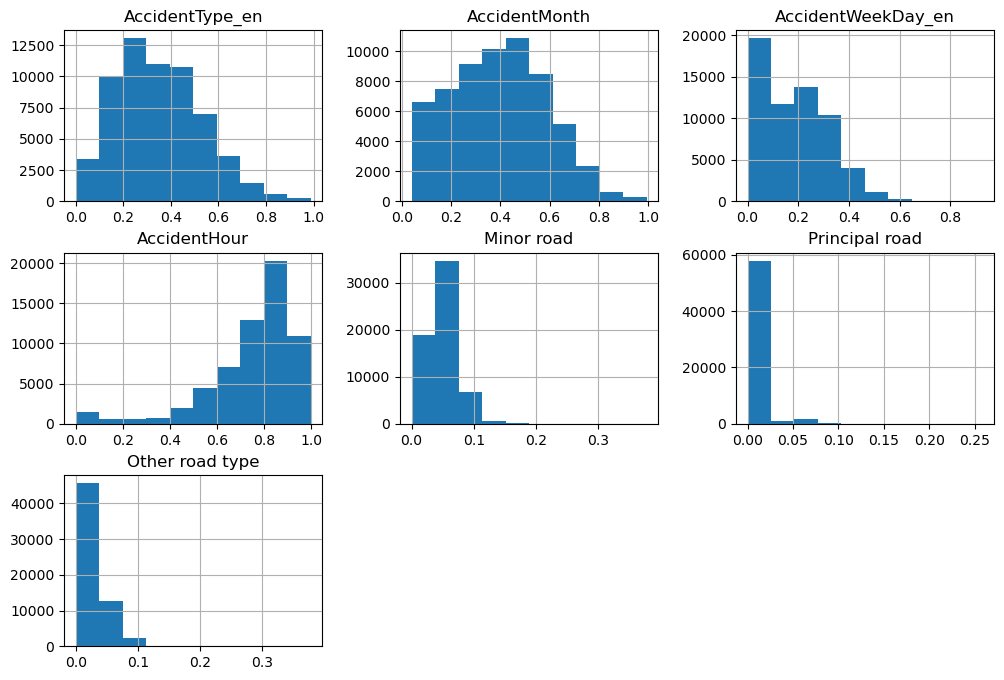

In [33]:
# Normalize the data with Normalizer
from sklearn.preprocessing import Normalizer

scaler = Normalizer()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled.hist(figsize=(12, 8))


In [34]:
#
#
#
#
#
#
#
#
#
#
#

# Ensembles with voting

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf_SVC = SVC() 
clf_kNN = KNeighborsClassifier() 
clf_RF = RandomForestClassifier()

estimators=[('SVC', clf_SVC), ('kNN', clf_kNN), ('RF', clf_RF)]

voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

In [63]:
# Preparing Trainnig and Test dataframes

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

predictors = data[['AccidentMonth','AccidentWeekDay_en','AccidentHour','Minor road','Principal road','Other road type']]
target = data['AccidentType_en']

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data => done separately to avoid "cross-contamination"
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [97]:
# Checking for Correlations

correlation_matrix = data.corr()
print(correlation_matrix)


ValueError: could not convert string to float: 'Accident with property damage'

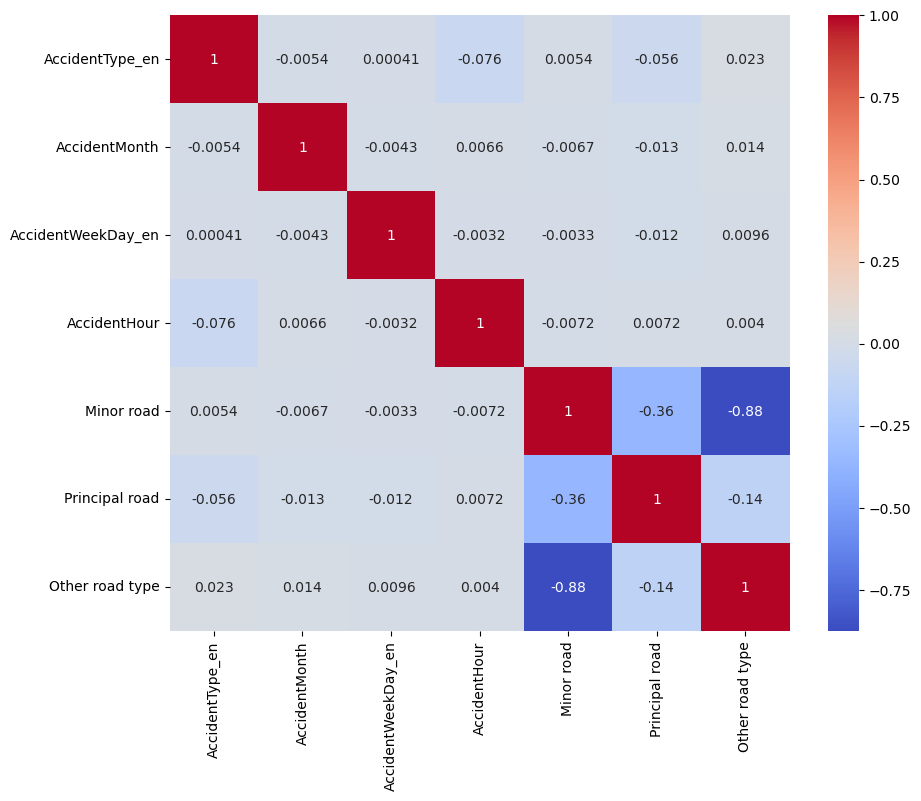

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()




In [ ]:
# Balancing the Dataset

In [65]:
# Training and predicting the voting ensemble
from sklearn.metrics import accuracy_score

voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

voting Accuracy: 0.290


In [66]:
# How do the single estimators perform?

for clf_name, clf in estimators:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("%3s Accuracy: %.3f" % (clf_name,accuracy_score(y_test , y_pred)))

SVC Accuracy: 0.327
kNN Accuracy: 0.247
 RF Accuracy: 0.287


In [8]:
# --->>> Your Turn <<<--- 
#
# a) Experiment wiht soft and hard voting 
# soft voting considers the confidence of a models prediction, instead of just the predicted category given by each model
# this does mean, that only models which give certainties can be used.
#
# b) Consider this quote from the documentation: 
# "In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order. 
# E.g., in the following scenario
#
#    classifier 1 -> class 2
#    classifier 2 -> class 1
#
# the class label 1 will be assigned to the sample."
# What do you conclude from this?

# basically, if there is a tie, whichever (of the classes that are in the tie) was named last is the one chosen

# Bagging Meta Classifier

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# --->>> Your Turn <<<---
# Try to build a bagging classifier using kNN as base learner

# n of estimators (so how many models are trained) improves accuracy
clf = BaggingClassifier(estimator=KNeighborsClassifier() ,
                        n_estimators=20, 
                        random_state=0, 
                        max_samples=0.5, 
                        max_features=0.3)

digits = load_digits()
X, y = digits.data, digits.target
X.shape

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.9) 

# data preparation
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train and predict the voting ensemble
from sklearn.metrics import accuracy_score

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("voting Accuracy: %.3f" % accuracy_score(y_test , y_pred))

voting Accuracy: 0.876
